### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

In [506]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
%config IPCompleter.greedy=True

In [507]:
#importing dataset
df = pd.read_csv('C:/Python/Python_Upgrad/LinearRegression/CarPrice_Assignment.csv')

##### <font color='red'>Data Preprocessing</font>

In [508]:
#Handling missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

##### From data set info we can see there is no missing data

In [509]:
#Checking data
pd.set_option('display.max_columns', None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [510]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)
df.rename(columns = {'CarName' : 'CarCompany'},inplace=True)
df.head(5)

,car_ID,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [511]:
#car_ID is not going to add any value in model preparation so lets drop these two columns
df.drop('car_ID',1,inplace=True)
#Taking backup of df
df_back = df
df.head(5)

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [512]:
#Checking Unique Car names
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<font color = red>Here we can see few spelling mistakes of upper case lower case issues in company names extracted. Let's correct these</font>

In [513]:
df['CarCompany'] = df['CarCompany'].str.replace('maxda', 'mazda')
df['CarCompany'] = df['CarCompany'].str.replace('Nissan', 'nissan')
df['CarCompany'] = df['CarCompany'].str.replace('porcshce', 'porsche')
df['CarCompany'] = df['CarCompany'].str.replace('toyouta', 'toyota')
df['CarCompany'] = df['CarCompany'].str.replace('vokswagen', 'volkswagen')
df['CarCompany'] = df['CarCompany'].str.replace('vw', 'volkswagen')

In [514]:
df['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

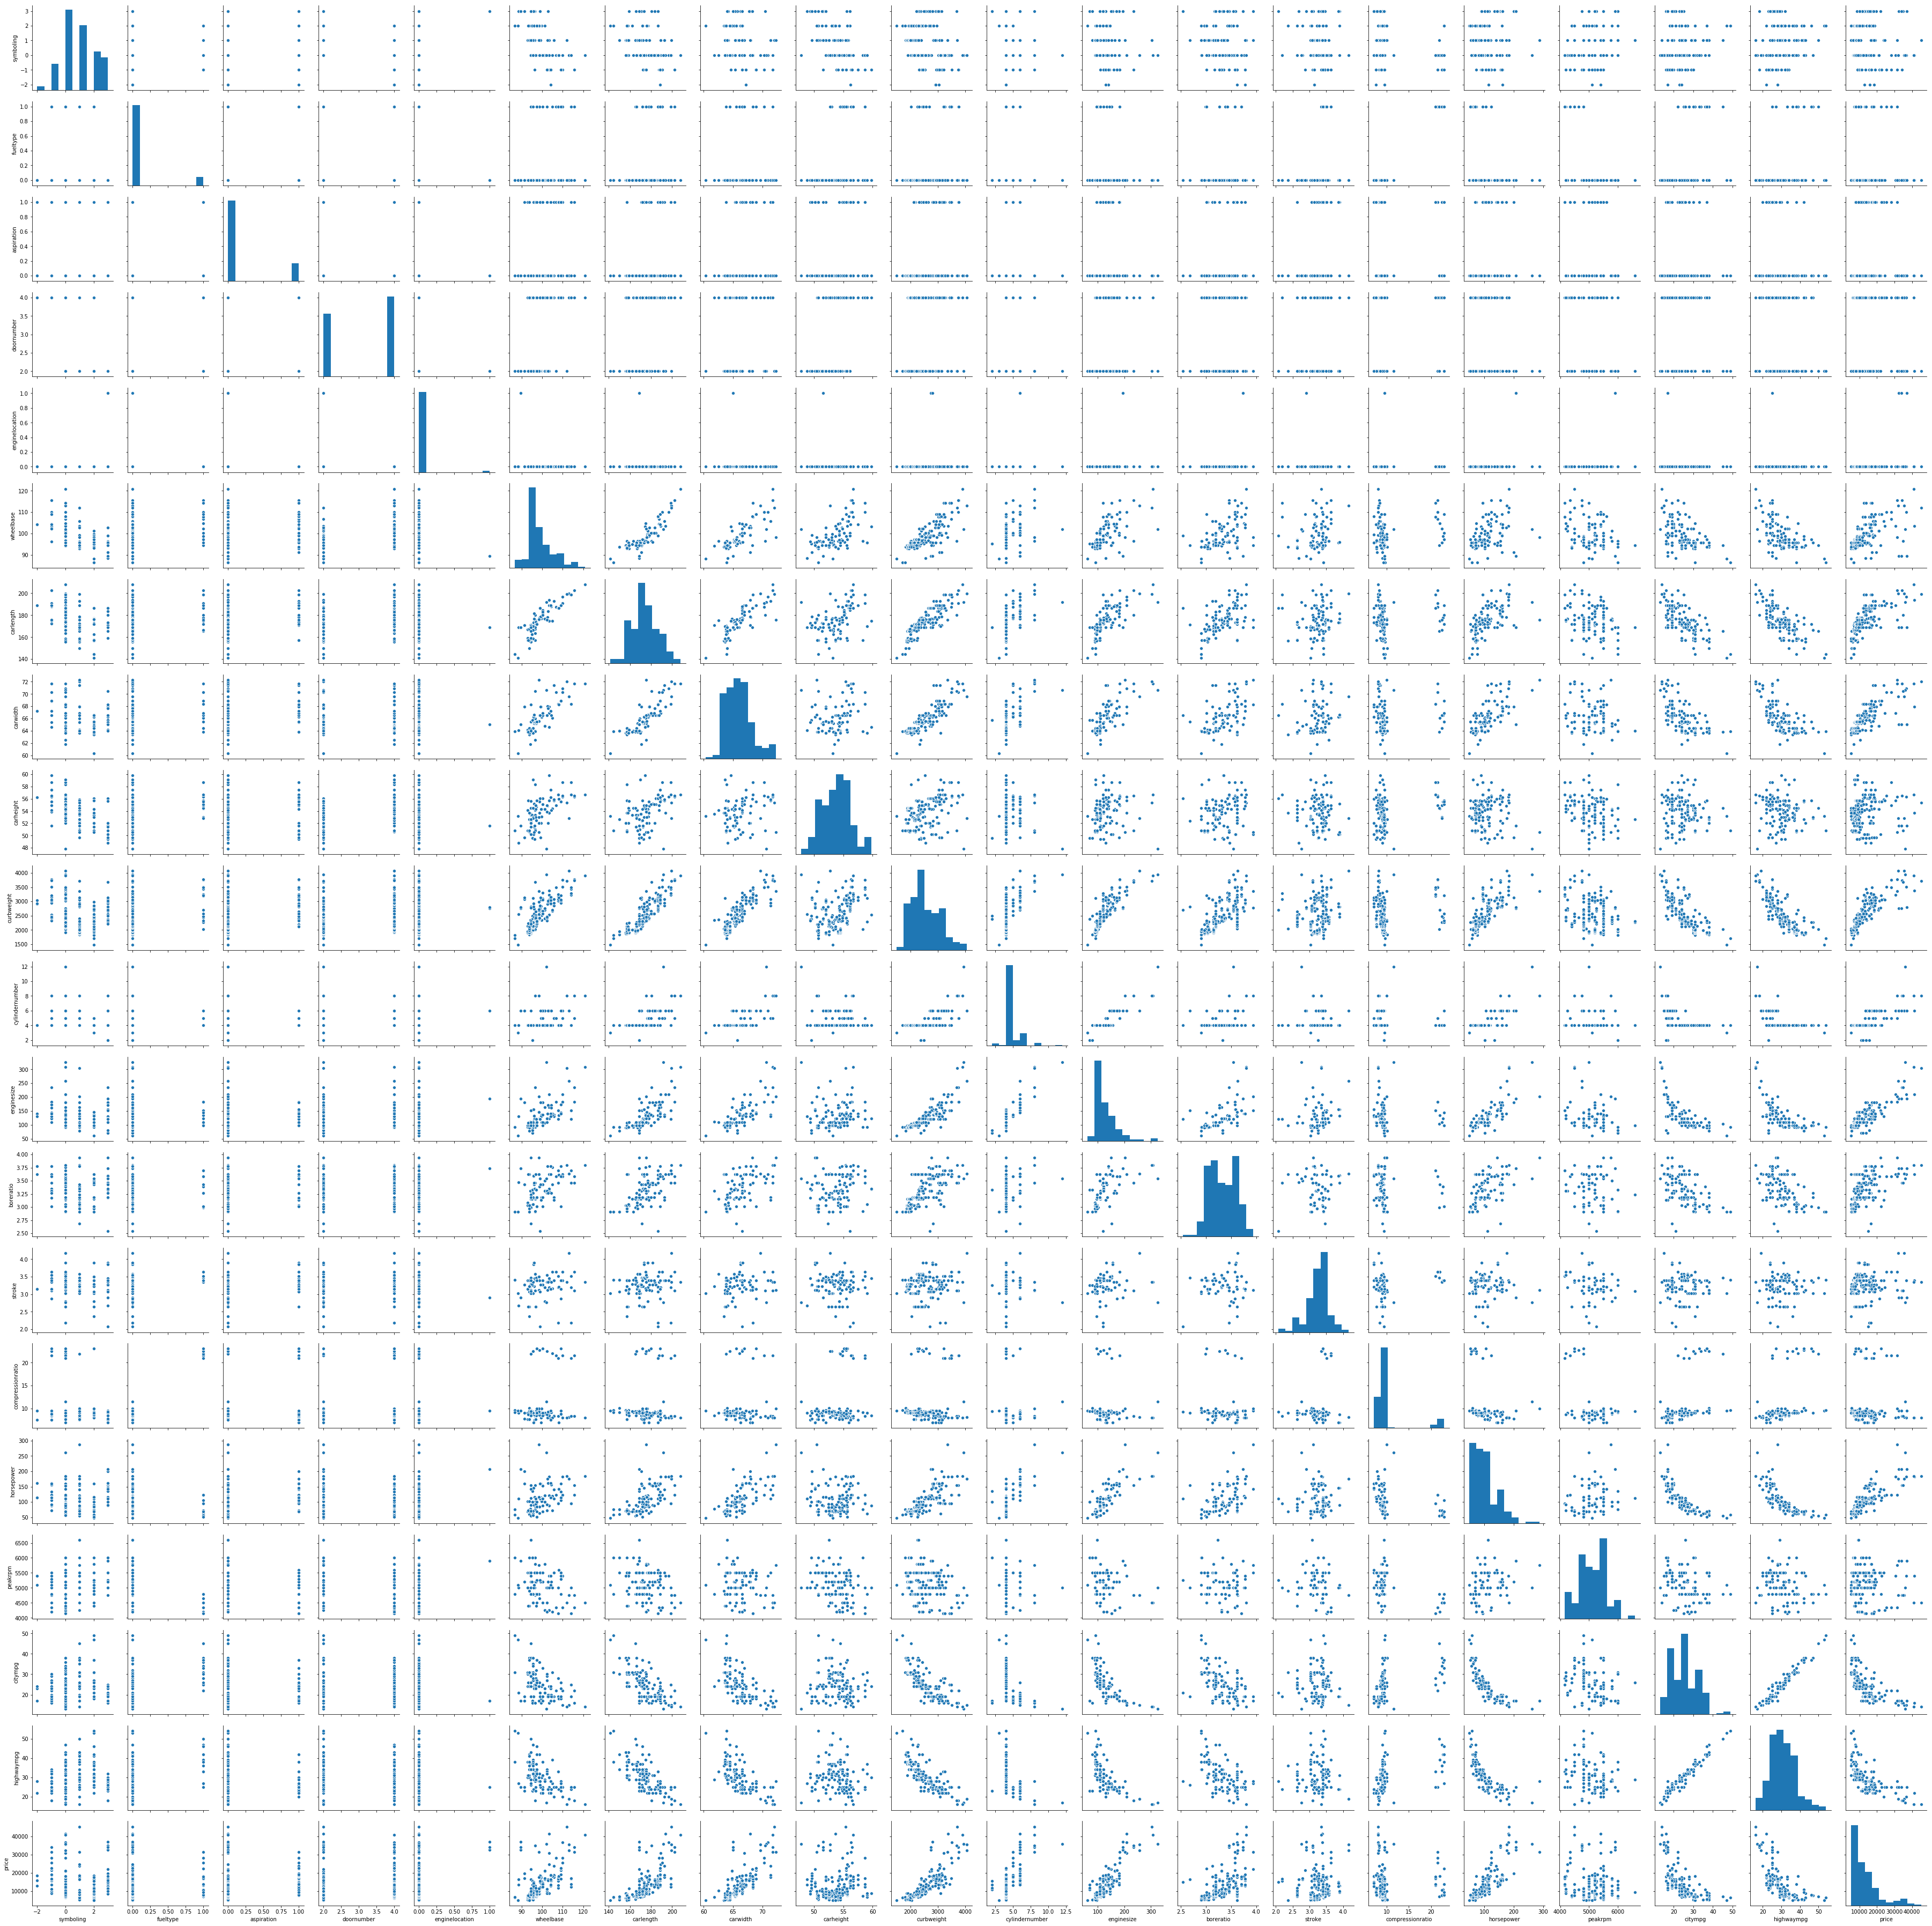

In [625]:
#Splitting dependent and independent variables
sns.pairplot(df)
plt.show()

###### <font color='blue'>From the above scatter plot we can see definitely price has associations with <font color='red'>carlength,car width, curbweight, engine size, horsepower</font>. So these can be possible predictors.</font>

* <font color = red>Now lets see the association with categorical variables</font>

 1.  CarCompany
 2.  fueltype
 3.  aspiration
 4.  doornumber
 5.  carbody
 6.  drivewheel
 10.  enginelocation
 11.  enginetype
 12.  cylindernumber
 13.  fuelsystem	

In [516]:
# lets define a function to plot price across categorical variables
def plot_cat(cat_var):
    plt.figure(figsize=(150,30))
    plt.subplot(2,5,1)
    sns.boxplot(x=cat_var, y='price', data=df)
    plt.show()

In [517]:
#Car company vs price
#plot_cat('CarCompany')

In [518]:
#Car fueltype vs price
#plot_cat('fueltype')

In [519]:
#Car aspiration vs price
#plot_cat('aspiration')

In [520]:
#Car doornumber vs price
#plot_cat('doornumber')

###### <font color='blue'>From the above box plot we can see there is no fuch varience of price when door no is two or four <font color='red'>So we will no consider door no as a predictor</font>. </font>

In [521]:
#Car carbody vs price
plot_cat('carbody')

In [522]:
#Car drivewheel vs price
plot_cat('drivewheel')

In [523]:
#Car enginelocation vs price
plot_cat('enginelocation')

In [524]:
#Car enginetype vs price
plot_cat('enginetype')

In [525]:
#Car cylindernumber vs price
plot_cat('cylindernumber')

In [526]:
#Car fuelsystem vs price
#plot_cat('fuelsystem')

In [527]:
# Dropping doornumber  
#df.drop('doornumber',1,inplace=True)
#df.head(5)

##### Data preparation

In [528]:
#Taking Car_dataset from df
car_dataset  = df

In [529]:
#Let's make make values numeric wherever applicable
varlist = ['doornumber','cylindernumber']
def string_to_num(x):
    return x.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

#applying the function to car_dataset
car_dataset[varlist] = car_dataset[varlist].apply(string_to_num)

In [530]:
#Let's make make values binary where categorical variables are within two types
#varlist_binary = ['fueltype','aspiration','enginelocation']
varlist_binary = ['fueltype','aspiration','enginelocation']
def binary_map(x):
    return x.map({'diesel':1,'gas':0,'turbo':1,'std':0,'front':0,'rear':1})

#applying the function to car_dataset
car_dataset[varlist_binary] = car_dataset[varlist_binary].apply(binary_map)

In [531]:
df.head()

,symboling,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,0,0,2,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,0,0,4,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,0,0,4,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


###### <font color='blue'>So we are not left with <font color='red'>CarCompany,carbody, drivewheel, enginetype, fuelsystem</font> categorical variables which are non numeric</font>

###### Creating dummy encoding for categorical variables which has level more than 2.

In [532]:
#Encoding dummies for CarCompany
#CarCompany = pd.get_dummies(car_dataset['CarCompany'],drop_first=True)
#adding it to actual dataset 
#car_dataset = pd.concat([car_dataset,CarCompany],axis = 1)
#dropping CarCompany as we got dummies for it
#Simply dropping car company as RFE kepy on selecting car company
car_dataset.drop('CarCompany',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,2,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,2,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,4,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,4,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [533]:
#Encoding dummies for carbody
carbody = pd.get_dummies(car_dataset['carbody'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,carbody],axis = 1)
#dropping carbody as we got dummies for it
car_dataset.drop('carbody',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon
0,3,0,0,2,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0
1,3,0,0,2,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0
2,1,0,0,2,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0
3,2,0,0,4,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0
4,2,0,0,4,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0


In [534]:
#Encoding dummies for drivewheel
drivewheel = pd.get_dummies(car_dataset['drivewheel'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,drivewheel],axis = 1)
#dropping drivewheel as we got dummies for it
car_dataset.drop('drivewheel',1,inplace=True)
car_dataset.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0


In [535]:
#Encoding dummies for enginetype
enginetype = pd.get_dummies(car_dataset['enginetype'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,enginetype],axis = 1)
#dropping enginetype as we got dummies for it
car_dataset.drop('enginetype',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0


In [536]:
#Encoding dummies for fuelsystem
fuelsystem = pd.get_dummies(car_dataset['fuelsystem'],drop_first=True)
#adding it to actual dataset 
car_dataset = pd.concat([car_dataset,fuelsystem],axis = 1)
#dropping fuelsystem as we got dummies for it
car_dataset.drop('fuelsystem',1,inplace=True)
car_dataset.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [537]:
car_dataset.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [538]:
#Copying this to master data
car_master = car_dataset

In [539]:
car_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 39 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               2

In [540]:
#Taking a safe CSV from car_master
#car_master.to_csv("car_master.csv",encoding='utf-8', index=False)

In [541]:
#Shifting the target column at the end
car_master['price_dup'] = car_master['price']
car_master.drop('price',1,inplace=True)
car_master.rename(columns = {'price_dup' : 'price'}, inplace=True)
car_master.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,price
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13495.0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,16500.0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,16500.0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,13950.0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,17450.0


In [542]:
#Now lets save this DF in a seperate csv and we will work on that CSV here onwards.
#car_master.to_csv("car_master.csv",encoding='utf-8', index=False)

### Setting up model

In [543]:
#creating training and test set
from sklearn.model_selection import train_test_split
np.random.seed(0)
car_master_train, car_master_test = train_test_split(car_master, train_size = 0.7, test_size = 0.3, random_state = 100)

In [544]:
#Using min max scaling to standardize all the valriables in car_master dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [545]:
#now going to apply minmaxscaller too all variables except dummies and 'fueltype','aspiration','enginelocation'
varlist_scaler = ['symboling','doornumber','wheelbase','carlength','carwidth', 'carheight','curbweight','cylindernumber',
                 'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']



In [546]:
#car_master_train[varlist_scaler] = scaler.fit_transform(car_master_train[varlist_scaler])

In [547]:
#car_master_train.to_csv("car_master_train.csv",encoding='utf-8', index=False)
car_master_train.drop('mfi',1,inplace=True)
car_master_train.drop('spfi',1,inplace=True)

C:\Users\home\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [548]:
car_master_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mpfi,spdi,price
122,1,0,0,4,0,93.7,167.3,63.8,50.8,2191,4,98,2.97,3.23,9.4,68,5500,31,38,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,7609.0
125,3,0,0,2,0,94.5,168.9,68.3,50.2,2778,4,151,3.94,3.11,9.5,143,5500,19,27,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,22018.0
166,1,0,0,2,0,94.5,168.7,64.0,52.6,2300,4,98,3.24,3.08,9.4,112,6600,26,29,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,9538.0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,16500.0
199,-1,0,1,4,0,104.3,188.8,67.2,57.5,3157,4,130,3.62,3.15,7.5,162,5100,17,22,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,18950.0


In [549]:
car_master_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mpfi,spdi,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.797203,0.090909,0.181818,3.118881,0.006993,98.523077,173.416783,65.839860,53.551748,2539.510490,4.405594,124.958042,3.307413,3.250070,10.052587,102.552448,5130.069930,25.391608,30.874126,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.440559,0.041958,13056.347322
std,1.195999,0.288490,0.387050,0.996399,0.083624,5.961835,12.598122,2.214203,2.433766,544.650539,1.158178,40.974034,0.260997,0.312529,3.794890,39.722750,481.273979,6.701939,6.973660,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.498199,0.201198,7807.036883
min,-2.000000,0.000000,0.000000,2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,94.500000,165.650000,63.950000,51.800000,2121.000000,4.000000,97.000000,3.065000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7554.000000
50%,1.000000,0.000000,0.000000,4.000000,0.000000,96.500000,172.000000,65.400000,53.700000,2405.000000,4.000000,110.000000,3.310000,3.270000,9.000000,94.000000,5200.000000,25.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10198.000000
75%,1.000000,0.000000,0.000000,4.000000,0.000000,101.200000,182.300000,66.900000,55.350000,2930.500000,4.000000,141.000000,3.540000,3.400000,9.400000,116.000000,5500.000000,31.000000,36.500000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,16465.000000
max,3.000000,1.000000,1.000000,4.000000,1.000000,115.600000,202.600000,72.300000,59.100000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41315.000000


In [550]:
car_master_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 37 columns):
symboling           143 non-null int64
fueltype            143 non-null int64
aspiration          143 non-null int64
doornumber          143 non-null int64
enginelocation      143 non-null int64
wheelbase           143 non-null float64
carlength           143 non-null float64
carwidth            143 non-null float64
carheight           143 non-null float64
curbweight          143 non-null int64
cylindernumber      143 non-null int64
enginesize          143 non-null int64
boreratio           143 non-null float64
stroke              143 non-null float64
compressionratio    143 non-null float64
horsepower          143 non-null int64
peakrpm             143 non-null int64
citympg             143 non-null int64
highwaympg          143 non-null int64
hardtop             143 non-null uint8
hatchback           143 non-null uint8
sedan               143 non-null uint8
wagon               143

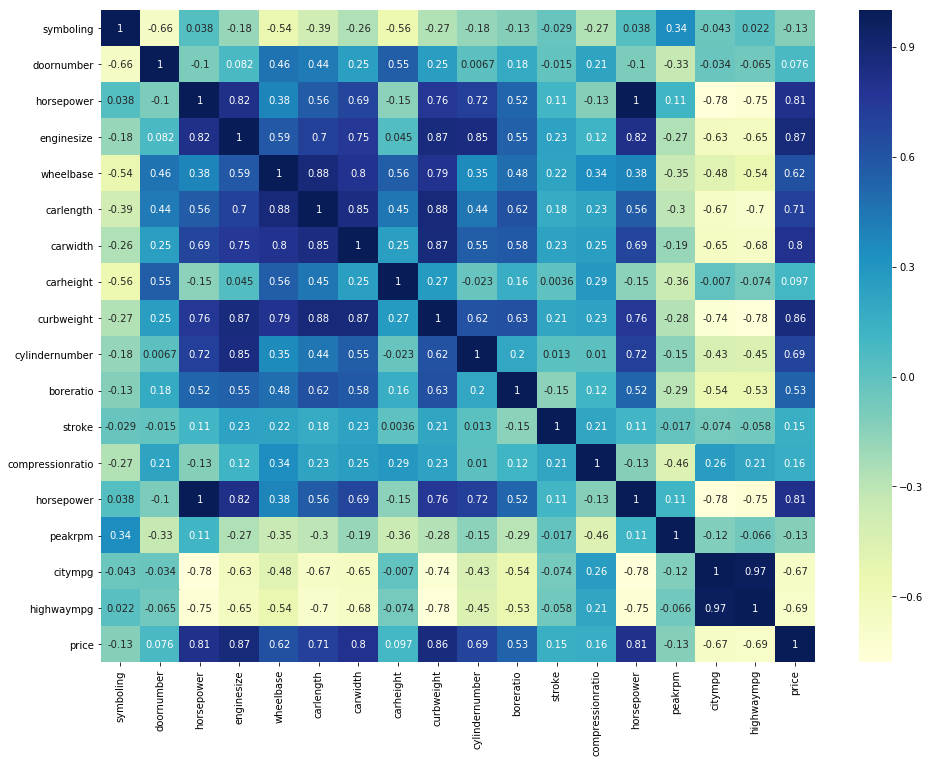

In [551]:
# Now checking the correlation coefficient to check which variables are highly corelated

plt.figure(figsize = (16, 12))
sns.heatmap(car_master_train[['symboling','doornumber','horsepower','enginesize','wheelbase',
                              'carlength','carwidth','carheight','curbweight','cylindernumber',
                              'boreratio','stroke','compressionratio','horsepower','peakrpm',
                              'citympg','highwaympg','price']].corr(), annot = True, cmap="YlGnBu")
plt.show()

as we can see horsepower, enginesize, carwidth, curbweight,horsepower seems to be correlated with price. 
Let's check these in pairplots

In [552]:
#defining a functionto vizualize these in pair plots
#plt.figure(figsize=[8,8])
#plt.scatter(car_master_train.horsepower, car_master_train.price)
#plt.show()

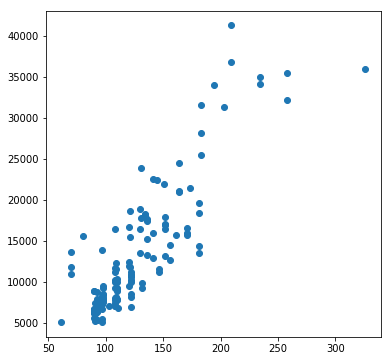

In [553]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.enginesize, car_master_train.price)
plt.show()

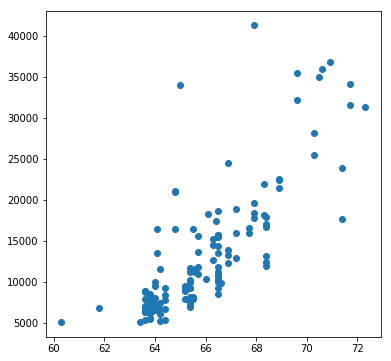

In [554]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.carwidth, car_master_train.price)
plt.show()

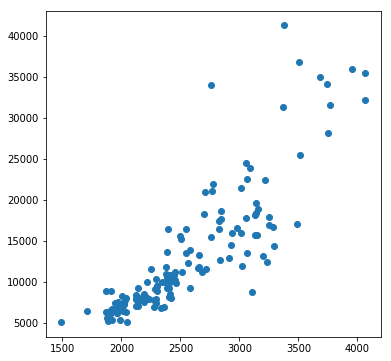

In [555]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.curbweight, car_master_train.price)
plt.show()

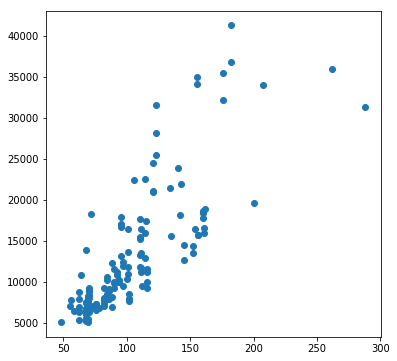

In [556]:
#defining a functionto vizualize these in pair plots
plt.figure(figsize=[6,6])
plt.scatter(car_master_train.horsepower, car_master_train.price)
plt.show()

### Model building

In [557]:
#taking X and Y set for model building
Y_train = car_master_train.pop('price')
X_train = car_master_train

#### Building linear model

In [558]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [566]:
#X_train.info()
#36 columns

In [567]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm, 36)
rfe = rfe.fit(X_train, Y_train)

In [560]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', True, 1),
 ('fueltype', True, 1),
 ('aspiration', True, 1),
 ('doornumber', True, 1),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', True, 1),
 ('rwd', True, 1),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('2bbl', True, 1),
 ('4bbl', True, 1),
 ('idi', True, 1),
 ('mpfi', True, 1),
 ('spdi', True, 1)]

In [568]:
col = X_train.columns[rfe.support_]
col

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],
      dtype='object')

In [569]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [571]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [572]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\home\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [573]:
lm = sm.OLS(Y_train,X_train_rfe).fit()   # Running the linear model

In [574]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     40.03
Date:                Tue, 28 May 2019   Prob (F-statistic):           4.56e-47
Time:                        03:57:53   Log-Likelihood:                -1294.9
No. Observations:                 143   AIC:                             2662.
Df Residuals:                     107   BIC:                             2768.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.683e+04   2.05e+04  

##### Rebuilding the model

In [575]:
X_train_new = X_train_rfe.drop(["l"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm 
X_train_rfe = X_train[col]
X_train_lm = sm.add_constant(X_train_new)

In [576]:
lm = sm.OLS(Y_train,X_train_lm).fit()   # Running the linear model

In [577]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     41.58
Date:                Tue, 28 May 2019   Prob (F-statistic):           7.06e-48
Time:                        03:58:28   Log-Likelihood:                -1294.9
No. Observations:                 143   AIC:                             2660.
Df Residuals:                     108   BIC:                             2764.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.638e+04   2.02e+04  

In [415]:
#Rebuilding the model


In [578]:
#removing variables having high no of P values and r
X_train_new2 = X_train_rfe.drop(['l','carlength'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     43.23
Date:                Tue, 28 May 2019   Prob (F-statistic):           1.07e-48
Time:                        03:59:06   Log-Likelihood:                -1294.9
No. Observations:                 143   AIC:                             2658.
Df Residuals:                     109   BIC:                             2759.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -3.62e+04      2e+04  

In [582]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     44.98
Date:                Tue, 28 May 2019   Prob (F-statistic):           1.60e-49
Time:                        04:01:19   Log-Likelihood:                -1295.0
No. Observations:                 143   AIC:                             2656.
Df Residuals:                     110   BIC:                             2754.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.614e+04      2e+04  

In [583]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     46.83
Date:                Tue, 28 May 2019   Prob (F-statistic):           2.38e-50
Time:                        04:01:38   Log-Likelihood:                -1295.0
No. Observations:                 143   AIC:                             2654.
Df Residuals:                     111   BIC:                             2749.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.569e+04   1.98e+04  

In [584]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     48.78
Date:                Tue, 28 May 2019   Prob (F-statistic):           3.53e-51
Time:                        04:02:00   Log-Likelihood:                -1295.1
No. Observations:                 143   AIC:                             2652.
Df Residuals:                     112   BIC:                             2744.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.562e+04   1.97e+04  

In [585]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     50.87
Date:                Tue, 28 May 2019   Prob (F-statistic):           5.09e-52
Time:                        04:02:20   Log-Likelihood:                -1295.1
No. Observations:                 143   AIC:                             2650.
Df Residuals:                     113   BIC:                             2739.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.477e+04   1.94e+04  

In [586]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     53.04
Date:                Tue, 28 May 2019   Prob (F-statistic):           7.76e-53
Time:                        04:02:39   Log-Likelihood:                -1295.3
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     114   BIC:                             2734.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.217e+04   1.86e+04  

In [587]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     55.43
Date:                Tue, 28 May 2019   Prob (F-statistic):           1.08e-53
Time:                        04:03:01   Log-Likelihood:                -1295.3
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     115   BIC:                             2730.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.279e+04   1.84e+04  

In [588]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     57.61
Date:                Tue, 28 May 2019   Prob (F-statistic):           2.12e-54
Time:                        04:03:24   Log-Likelihood:                -1295.8
No. Observations:                 143   AIC:                             2646.
Df Residuals:                     116   BIC:                             2726.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.204e+04   1.84e+04  

In [589]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     57.61
Date:                Tue, 28 May 2019   Prob (F-statistic):           2.12e-54
Time:                        04:03:59   Log-Likelihood:                -1295.8
No. Observations:                 143   AIC:                             2646.
Df Residuals:                     116   BIC:                             2726.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.204e+04   1.84e+04  

In [592]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     59.42
Date:                Tue, 28 May 2019   Prob (F-statistic):           6.64e-55
Time:                        04:05:27   Log-Likelihood:                -1297.0
No. Observations:                 143   AIC:                             2646.
Df Residuals:                     117   BIC:                             2723.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -3.13e+04   1.84e+04  

In [593]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     61.36
Date:                Tue, 28 May 2019   Prob (F-statistic):           2.10e-55
Time:                        04:05:58   Log-Likelihood:                -1298.1
No. Observations:                 143   AIC:                             2646.
Df Residuals:                     118   BIC:                             2720.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.547e+04   1.82e+04  

In [594]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     64.46
Date:                Tue, 28 May 2019   Prob (F-statistic):           2.84e-56
Time:                        04:06:32   Log-Likelihood:                -1298.2
No. Observations:                 143   AIC:                             2644.
Df Residuals:                     119   BIC:                             2716.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.282e+04   1.72e+04     -1.

In [595]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     65.72
Date:                Tue, 28 May 2019   Prob (F-statistic):           2.12e-56
Time:                        04:07:01   Log-Likelihood:                -1300.4
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     120   BIC:                             2715.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.159e+04   1.67e+04     -2.

In [596]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     67.47
Date:                Tue, 28 May 2019   Prob (F-statistic):           1.20e-56
Time:                        04:07:35   Log-Likelihood:                -1302.3
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     121   BIC:                             2714.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.069e+04   1.69e+04     -2.

In [597]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     70.27
Date:                Tue, 28 May 2019   Prob (F-statistic):           3.46e-57
Time:                        04:07:59   Log-Likelihood:                -1303.4
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     122   BIC:                             2711.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.661e+04   1.67e+04     -2.

In [598]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     72.29
Date:                Tue, 28 May 2019   Prob (F-statistic):           2.25e-57
Time:                        04:08:30   Log-Likelihood:                -1305.4
No. Observations:                 143   AIC:                             2651.
Df Residuals:                     123   BIC:                             2710.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -2.14e+04   1.47e+04     -1.

In [599]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     74.99
Date:                Tue, 28 May 2019   Prob (F-statistic):           1.05e-57
Time:                        04:08:56   Log-Likelihood:                -1307.1
No. Observations:                 143   AIC:                             2652.
Df Residuals:                     124   BIC:                             2708.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.642e+04   1.46e+04     -1.

In [602]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [603]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carwidth,2747.76
3,carheight,1139.60
6,boreratio,1082.67
7,stroke,368.78
4,cylindernumber,227.20
5,enginesize,201.35
8,horsepower,54.24
11,sedan,21.99
10,hatchback,16.00
15,ohc,8.29


In [604]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     65.86
Date:                Tue, 28 May 2019   Prob (F-statistic):           6.50e-54
Time:                        04:13:51   Log-Likelihood:                -1319.8
No. Observations:                 143   AIC:                             2676.
Df Residuals:                     125   BIC:                             2729.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.037e+04   1.36e+04      1.

C:\Users\home\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [605]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carheight,833.71
5,boreratio,632.37
6,stroke,253.61
4,enginesize,162.48
3,cylindernumber,138.98
7,horsepower,53.79
10,sedan,21.68
9,hatchback,15.92
14,ohc,8.27
11,wagon,7.37


In [606]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     61.10
Date:                Tue, 28 May 2019   Prob (F-statistic):           2.21e-51
Time:                        04:15:02   Log-Likelihood:                -1328.9
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     126   BIC:                             2742.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.456e+04    1.3e+04      3.

C:\Users\home\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [607]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     64.09
Date:                Tue, 28 May 2019   Prob (F-statistic):           1.05e-51
Time:                        04:15:50   Log-Likelihood:                -1330.5
No. Observations:                 143   AIC:                             2693.
Df Residuals:                     127   BIC:                             2740.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.763e+04    1.3e+04      3.

In [608]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     68.73
Date:                Tue, 28 May 2019   Prob (F-statistic):           1.81e-52
Time:                        04:16:09   Log-Likelihood:                -1330.9
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     128   BIC:                             2736.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.808e+04   1.29e+04      3.

In [609]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     72.96
Date:                Tue, 28 May 2019   Prob (F-statistic):           7.15e-53
Time:                        04:16:36   Log-Likelihood:                -1332.3
No. Observations:                 143   AIC:                             2693.
Df Residuals:                     129   BIC:                             2734.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.709e+04    1.3e+04      3.

In [610]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     78.86
Date:                Tue, 28 May 2019   Prob (F-statistic):           1.37e-53
Time:                        04:17:07   Log-Likelihood:                -1332.9
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     130   BIC:                             2730.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.464e+04   1.28e+04      3.

In [611]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf','wagon'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     84.86
Date:                Tue, 28 May 2019   Prob (F-statistic):           4.87e-54
Time:                        04:17:31   Log-Likelihood:                -1334.3
No. Observations:                 143   AIC:                             2693.
Df Residuals:                     131   BIC:                             2728.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.369e+04   1.29e+04      3.

In [612]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,stroke,113.30
4,boreratio,81.11
3,enginesize,65.19
2,cylindernumber,62.28
9,ohc,6.45
7,rwd,3.29
6,sedan,2.13
10,rotor,1.66
0,aspiration,1.37
8,dohcv,1.12


In [613]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf','wagon','stroke'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     76.52
Date:                Tue, 28 May 2019   Prob (F-statistic):           5.73e-50
Time:                        04:19:39   Log-Likelihood:                -1347.1
No. Observations:                 143   AIC:                             2716.
Df Residuals:                     132   BIC:                             2749.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.389e+04   6522.087     -2.

C:\Users\home\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [614]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf','wagon','stroke','boreratio'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     85.32
Date:                Tue, 28 May 2019   Prob (F-statistic):           7.50e-51
Time:                        04:20:16   Log-Likelihood:                -1347.3
No. Observations:                 143   AIC:                             2715.
Df Residuals:                     133   BIC:                             2744.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9640.6430   1460.623     -6.

In [615]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf','wagon','stroke','boreratio','cylindernumber'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     96.38
Date:                Tue, 28 May 2019   Prob (F-statistic):           8.97e-52
Time:                        04:20:41   Log-Likelihood:                -1347.5
No. Observations:                 143   AIC:                             2713.
Df Residuals:                     134   BIC:                             2740.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9156.1669   1236.781     -7.

In [616]:
#removing variables having high no of P values and rebuilding the model
X_train_new = X_train_rfe.drop(['l','carlength','doornumber','citympg','4bbl','fwd','2bbl','mpfi','ohcv','idi',
                                'curbweight','fueltype','compressionratio','spdi','wheelbase','symboling',
                               'highwaympg','peakrpm','carwidth','carheight','hardtop','hatchback','horsepower',
                               'ohcf','wagon','stroke','boreratio','cylindernumber','sedan'], axis = 1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(Y_train,X_train_lm).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     107.7
Date:                Tue, 28 May 2019   Prob (F-statistic):           4.55e-52
Time:                        04:20:55   Log-Likelihood:                -1349.3
No. Observations:                 143   AIC:                             2715.
Df Residuals:                     135   BIC:                             2738.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9161.1444   1248.035     -7.

In [617]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,5.42
3,rwd,2.86
5,ohc,2.83
0,aspiration,1.26
6,rotor,1.13
1,enginelocation,1.04
4,dohcv,1.04


#### Residual Analysis of the train data

In [619]:
y_train_price = lm.predict(X_train_lm)

In [620]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

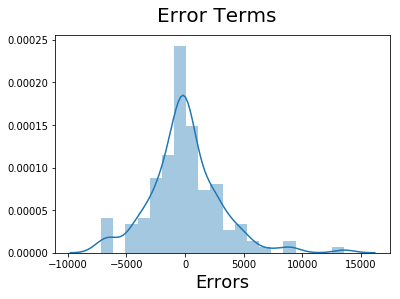

In [622]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label